<table>
    <tr>
        <td><img src="./imagenes/Macc.png" width="400"/></td>
        <td>&nbsp;</td>
        <td>
            <h1 style="color:blue;text-align:left">Inteligencia Artificial</h1></td>
        <td>
            <table><tr>
            <tp><p style="font-size:150%;text-align:center">Notebook</p></tp>
            <tp><p style="font-size:150%;text-align:center">Juegos (2/3) </p></tp>
            </tr></table>
        </td>
    </tr>
</table>

---

## Objetivo <a class="anchor" id="inicio"></a>

Hemos visto el problema de ganar un juego de suma cero contra un humano mediante el método Minimax. Ahora veremos cómo hacer más eficiente el tiempo de búsqueda al podar el árbol de conforntación mediante el algoritmo alfa-beta. También, veremos funciones de evaluación que nos permitirán interrumpir la búsqueda a una altura determinada del árboly así mejorar la eficiencia y mantener un buen desempeño del agente. 

Adaptado de (Russell & Norvig, 2020), sección 5.3.

## Secciones

Desarrollaremos la explicación de la siguiente manera:

* [Algoritmo de poda alfa-beta](#alfa-beta).
* [Funciones de evaluación](#feval)


## Algoritmo de poda alfa-beta <a class="anchor" id="alfa-beta"></a>

([Volver al inicio](#inicio))

Para explicar el funcionamiento de la poda alfa-beta consideremos un ejemplo más bien simple. Supongamos un juego que define el siguiente árbol, con la utilidad de los estados terminales ya puestos sobre la figura debajo de cada hoja, y los nombres de las acciones posibles etiquetando cada arista:

<img src="imagenes/alfa-beta.png" width="350px">

Este árbol lo hemos puesto para ilustrar el comportamiento del juego. No obstante, es muy importante observar que la idea del algoritmo es evitar tener que construir todo el árbol, **deteniendo la exploración del mismo cuando sabemos que una acción no es conveniente para el jugador respectivo**. Vamos a ver cómo se logra esto. 

La creación del árbol de confrontación se hace explorando los hijos de cada estado. Durante esta exploración **se llevará un registro del valor máximo de las acciones hasta ahora.** Este es el valor alfa. **También se llevará un registro del valor mínimo (beta).** Veamos en nuestro ejemplo para qué llevamos este registro de alfa (el funcionamiento de beta es análogo intercambiando jugadores). 

El algoritmo **comienza a explorar el árbol primero en profundidad**, *inicializado con un valor de alfa de $-\infty$ y de beta de $\infty$*. Estamos asumiendo que en la raíz (estado A) le corresponde el turno a MAX:

<img src="imagenes/alfa-beta-1.png" width="350px">

Una vez se obtiene el valor minimax para el primer hijo explorado (en este caso B), se puede asignar un valor a alfa (en este caso, 3):

<img src="imagenes/alfa-beta-2.png" width="350px">

Este valor de alfa se usa en la exploración del siguiente hijo, en este caso el estado C. Esto es, en la expansión de los hijos de C (subexpansiones) se utiliza el valor de alfa = 3. **Aquí observamos que la primera subexpansión representa una utilidad de 2, que es inferior a alfa. Este es el criterio para detener la exploración de C.**

<img src="imagenes/alfa-beta-3.png" width="350px">

La razón de esta detención debe ser clara. Para establecer el valor minimax del estado C, MIN buscará una opción con mínimo valor minimax. Este valor será menor o igual a 2. Esto permite deducir que en el estado A, MAX no tomará la acción que lo lleve al estado C, toda vez que el valor minimax de una acción ya explorada le reporta un mejor valor (a saber, la acción que lo lleva al estado B). Es por esto que no tiene sentido seguir explorando el estado C y toda esta rama puede podarse. 

### Pseudo código de la poda alfa-beta

El siguiente es el pseudo código para el algoritmo de poda alfa-beta:

<img src="imagenes/poda-alfa-beta.png" width="500px">

**Ejercicio 1:**

Implemente un código python `alpha_beta_search` con la poda alfa-beta y corra el algoritmo desde la raíz.

In [6]:
from juegos import Triqui
import numpy as np


def alpha_beta_search(game: Triqui,
                      state: np.matrix):
    
    #gets current player
    player      = game.a_jugar(state)
    value, move = max_value_alfa_beta(game  = game,
                                      state = state,
                                      alpha = -np.inf,
                                      beta  = np.inf)
    
    return move


<img src="imagenes/poda-alfa-beta.png" width="500px">

In [9]:
def max_value_alfa_beta(game:  Triqui,
                        state: np.matrix,
                        alpha:   float,
                        beta:   float):
    
    player = game.a_jugar(state)
    v      = -np.inf

    if game.es_terminal(state):
        return game.utilidad(state, player), None
    
    for action in game.acciones(state):
        
        v2, a2 = min_value_alfa_beta(game,
                                     game.resultado(state, action),
                                     alpha,
                                     beta)
        if v2 > v:
            v, move = v2, action
            alpha   = max([alpha, v])
    
        if v >= beta:
            return v, move
        
    return v, move
    
    
def min_value_alfa_beta(game:  Triqui,
                        state: np.matrix,
                        alpha:   float,
                        beta:   float):
    
    player = game.a_jugar(state)
    v      = np.inf

    if game.es_terminal(state):
        return game.utilidad(state, player), None
    
    for action in game.acciones(state):
        
        v2, a2 = max_value_alfa_beta(game,
                                     game.resultado(state, action),
                                     alpha,
                                     beta)
        if v2 < v:
            v, move = v2, action
            beta    = min([beta, v])
    
        if v <= alpha:
            return v, move
        
    return v, move


---

**Ejercicio 2:**

Adapte la función `alpha_beta_search` para que la decisión que se tome sea sensible al jugador al que le corresponde el turno.

In [10]:
def alpha_beta_search(game: Triqui,
                      state: np.matrix):
    
    player = game.a_jugar(state)
    
    if player == 2: 
        v, move = max_value_alfa_beta(game  = game,
                                      state = state,
                                      alpha = -np.inf,
                                      beta  = np.inf)

    elif player == 1:
        v, move = min_value_alfa_beta(game  = game,
                                      state = state,
                                      alpha = -np.inf,
                                      beta  = np.inf)
    
    else:
        print("Are you messing with me?")
        return None
    
    return move

---

### Comparación de tiempos

Vamos a revisar qué tanto más es eficiente el algoritmo de poda alfa-beta respecto al algoritmo original minimax, para el caso que nos ocupa de implementar el triqui.

<AxesSubplot:xlabel='No. de jugada', ylabel='Tiempo'>

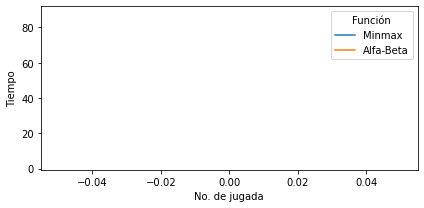

In [11]:
from tiempos import compara_funciones
from copy import deepcopy
from minimax import minimax_search
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

funs = [
    lambda s: minimax_search(tri, s),
    lambda s: alpha_beta_search(tri, s),
]
nombres = [
    'Minmax', 
    'Alfa-Beta', 
]

tri = Triqui()
s = tri.estado_inicial
jugadas = [(0, 0)]#, (1, 1), (0, 1), (0, 2), (2, 0)]#, (1, 0), (1, 2), (2, 1), (2, 2)]
lista_dfs = []

for i, a in enumerate(jugadas):
    data = compara_funciones(funs=funs, arg=s, nombres=nombres, N=1)
    data['No. de jugada'] = i
    lista_dfs.append(data)
    s = deepcopy(tri.resultado(s, a))
    
data = pd.concat(lista_dfs)

# Graficando
fig, ax = plt.subplots(1,1, figsize=(3*len(funs),3), tight_layout=True)
sns.lineplot(data=data, hue='Función', x='No. de jugada', y='Tiempo')

Podemos ver que, en este caso, la poda alfa-beta hace que la búsqueda de una decisión sea muy eficiente, comparada con la búsqueda del algoritmo minimax.

---

### Engine con poda alfa-beta

Podemos jugar de nuevo el triqui, esta vez con menos demora en la toma de decisiones:

In [32]:
# Corra esta celda para comenzar un juego nuevo

from juegos import Triqui
from IPython.display import clear_output
from time import sleep
import matplotlib.pyplot as plt

tri = Triqui()
s = tri.estado_inicial

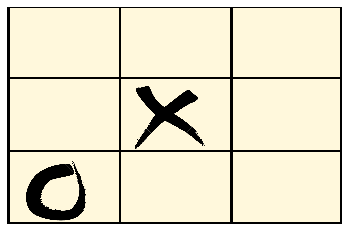

In [33]:
# Introduzca aquí su jugada, corra la celda y espere
# la jugada de O. Luego, vuelva a cambiar aquí mismo 
# su jugada y corra la celda de nuevo, etc.
a = (1,1)

assert(a in tri.acciones(s)), 'Acción no permitida. Intente de nuevo.'

###################
s = tri.resultado(s, a)
#clear_output(wait=True)
tri.pintar_estado(s)
plt.show()

# Computador responde
if not tri.es_terminal(s):
    a = alpha_beta_search(tri, s)
    s = tri.resultado(s, a)
    sleep(1)
    clear_output(wait=True)
    tri.pintar_estado(s)
    plt.show()
    if tri.es_terminal(s):
        print('Juego terminado. ¡Gana O!')
else:
    jugador = tri.a_jugar(s)
    if tri.utilidad(s, jugador)==0:
        print('Juego terminado. ¡Empate!')
    else:
        print('Juego terminado. ¡Gana X!')

## Funciones de evaluación <a class="anchor" id="feval"></a>

([Volver al inicio](#inicio))

Vamos a ver ahora un ejemplo muy bonito en el que se requiere usar funciones de evaluación para darle un valor a un estado. Observe que los dos algoritmos anteriores atribuyen valor minimax a los estados a partir de la utilidad de los estados terminales. Estos algoritmos toman esta utilidad y la 'suben' por los estados hasta la raíz. Pero, ¿qué pasa si es muy ineficiente llegar hasta el estado final para obtener una utilidad? Esto ocurre en el juego del ajedrez, en donde la explosión de estados es exponencial. Por ejemplo, expandir un tablero tres jugadas hacia adelante implica considerar alrededor de 726 millones de estados.

Para evitar tener que bajar hasta los estados terminales, se puede usar una función `is_cutoff(s)`, la cual utiliza un criterio de detención para la expansión de estados. Esta función reemplazará el criterio `es_terminal` en los algoritmos minimax y poda alfa-beta.

In [34]:
def is_cutoff(self, board, d):
    if self.es_terminal(board):
        return True
    elif d >= max_lim:
        return True
    else:
        return False

Cuando se 'dispara' la condición `is_cutoff` y el estado no es terminal, debemos retornar un valor. Este valor estará dado por una función de evaluación, que debe aproximar qué tan bueno es un estado. Si el estado es mejor para MAX, la función de evaluación debe retornar valores positivos grandes; si es mejor para MIN, debe retornar valores negativos grandes. Veamos esto en el ejemplo del ajedrez.

### Torre y rey contra rey solitario

Uno de los finales que todo principiante en ajedrez debe aprender es el de hacer mate mediante torre y rey contra rey solitario. Una implementación en python usando la librería [python-chess](https://python-chess.readthedocs.io/en/latest/) es la siguiente. Note que las acciones usan la [notación algebráica estándar](https://es.wikipedia.org/wiki/Notaci%C3%B3n_algebraica).

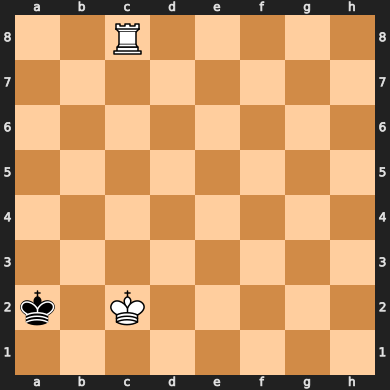

In [36]:
from juegos import ReyTorreRey
from IPython.display import clear_output
from time import sleep
import matplotlib.pyplot as plt
import numpy as np
import re

roo = ReyTorreRey(tablero_inicial=2)
s = roo.estado_inicial
s

# Juegan las negras

En este tablero se puede hacer mate en dos jugadas. El mate se obtiene después de:

1.  ...  Ka3
2. Rc4  Ka2
3. Ra4++

Al introducir cada jugada, usaremos el método `jugada_manual`, en lugar de `resultado`:

Mate? False


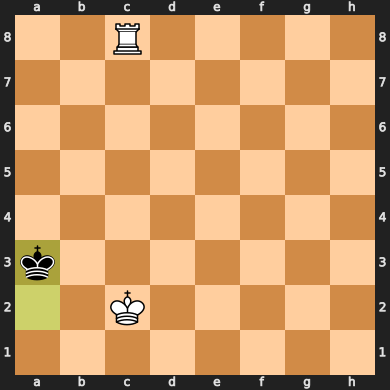

In [37]:
s = roo.jugada_manual(s, 'Ka3')
print('Mate?', roo.es_terminal(s))
s

Mate? False


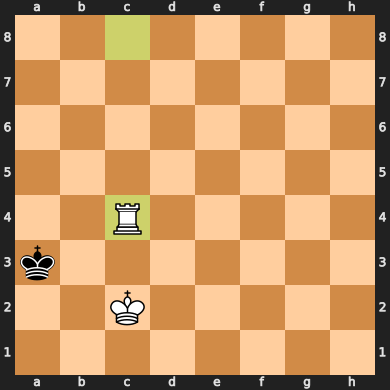

In [38]:
s = roo.jugada_manual(s, 'Rc4')
print('Mate?', roo.es_terminal(s))
s

Mate? False


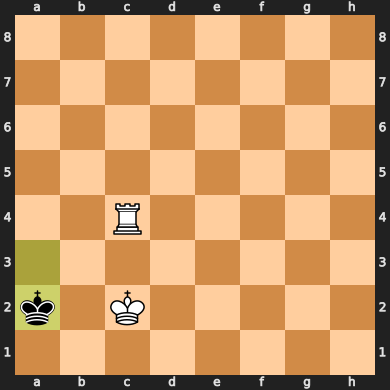

In [39]:
s = roo.jugada_manual(s, 'Ka2')
print('Mate?', roo.es_terminal(s))
s

Mate? True


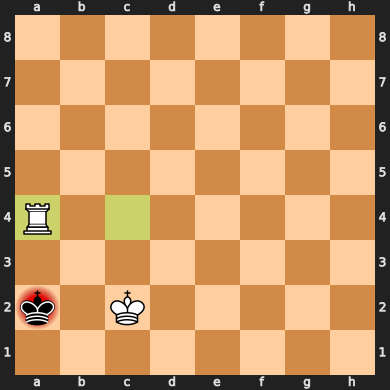

In [40]:
s = roo.jugada_manual(s, 'Ra4')
print('Mate?', roo.es_terminal(s))
s

Observe que, a pesar de que el mate está tan cerca, la creación de un árbol de confrontación mediante la metodología depth-first se quedará atascada en estados en los cuales el rey blanco se aleja progresivamente del rey negro. Para evitar este descenso, usamos el criterio `is_cutoff`, junto con una función de evaluación.

La función de evaluación que proponemos es darle una mejor evaluación a las blancas (MAX) cuanto más arrinconado esté el rey negro. El siguiente tablero muestra el valor de la función de evaluación dependiendo de la casilla en que se encuentre el rey negro:

<img src="imagenes/rincon.png" width="350px">

Por ejemplo, si el rey negro está en e3, la función de evaluación retornará -1.

In [41]:
def eval(self, board, jugador):
    if self.es_terminal(board):
        return self.utilidad(board, jugador)
    else:
        # Contamos rey negro en borde
        fila, columna = self.casilla_pieza(board, 'k')
        rey_negro_fila = (4 - fila if fila < 4 else (fila % 4) + 1) - 3 
        rey_negro_columna = (4 - columna if columna < 4 else (columna % 4)) - 3
        rincon = max(rey_negro_fila, rey_negro_columna)
        return rincon

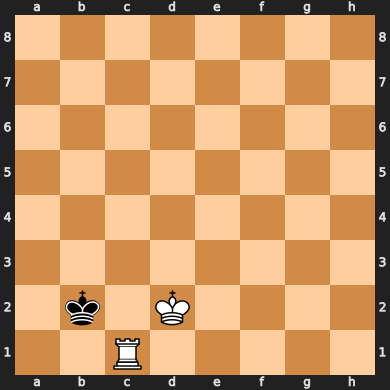

In [42]:
setattr(ReyTorreRey,"eval",eval)
roo = ReyTorreRey(tablero_inicial=3)
s = roo.estado_inicial
s

In [43]:
roo.eval(s, roo.a_jugar(s))

0

**Ejercicio 3:**

Sobreviva el ataque de las blancas, las cuales juegan usando la función de evaluación anteriormente descrita.

In [44]:
def is_cutoff(self, board, d):
    if self.es_terminal(board):
        return True
    elif d >= max_lim:
        return True
    else:
        return False
    
def H_minimax_alfa_beta(problema, board, d, alfa, beta):
#    if d == 0:
#        lista = []
#        for a in problema.acciones(board):
#            board_resultado = problema.resultado(board, a)
#            v2, a2 = H_minimax_alfa_beta(problema, board_resultado, d+1, alfa, beta)
#            lista.append((v2,a))
#        print(lista)
    jugador = problema.a_jugar(board)
#    print("Jugador:", jugador)
    if problema.is_cutoff(board, d):
#        print("feval:", problema.eval(board, jugador))
        return problema.eval(board, jugador) - 0.1*d, None
    elif jugador == 'blancas':
        v = -np.infty
        for a in problema.acciones(board):
            board_resultado = problema.resultado(board, a)
            v2, a2 = H_minimax_alfa_beta(problema, board_resultado, d+1, alfa, beta)
            if v2 > v:
                v = v2
                accion = a
                alfa = max(alfa, v)
            if v >= beta:
                return v, accion
        return v, accion
    elif jugador == 'negras':
        v = np.infty
        for a in problema.acciones(board):
            board_resultado = problema.resultado(board, a)
            v2, a2 = H_minimax_alfa_beta(problema, board_resultado, d+1, alfa, beta)
            if v2 < v:
                v = v2
                accion = a
                beta = min(beta, v)
            if v <= alfa:
                return v, accion
        return v, accion
    else:
        raise NameError("Oops!")            


In [47]:
from juegos import ReyTorreRey
from IPython.display import clear_output, display, Image
from time import sleep
import matplotlib.pyplot as plt
import numpy as np
import re

###################
# Búsqueda con profundidad limitada
max_lim = 4
setattr(ReyTorreRey,"is_cutoff",is_cutoff)
setattr(ReyTorreRey,"eval",eval)
roo = ReyTorreRey(tablero_inicial=3)
s = roo.estado_inicial


In [48]:
# Introduzca aquí su jugada y corra la celda
a = 'Kd4'
###################
s = roo.jugada_manual(s, a)
display(s)
if not roo.es_terminal(s):
    v, a = H_minimax_alfa_beta(roo, s, 0, -np.infty, np.infty)
    s = roo.resultado(s, a)
    sleep(1)
    clear_output(wait=True)
    display(s)
    if roo.es_terminal(s):
        print('Juego terminado. ¡Ganan las blancas!')
else:
    jugador = roo.a_jugar(s)
    if roo.utilidad(s, jugador)==0:
        print('Juego terminado. ¡Tablas!')
    else:
        print('Juego terminado. ¡Ganan las negras!')

ValueError: illegal san: 'Kd4' in 8/8/8/8/8/8/1k1K4/2R5 b - - 0 1

---

La anterior función de evaluación no es muy buena. La siguiente función considerará una combinación lineal de los siguientes criterios:

* Contar material, para no dejar que el rey negro tome la torre.
* Rey en la orilla, para favorecer tableros en los que el rey negro esté acorralado.
* Favorecer la oposición de los reyes. Para hacer mate, los reyes deben estar en oposición.


In [49]:
def eval(self, board, jugador):
    if self.es_terminal(board):
#        print("Utilidad", jugador, self.utilidad(board, jugador))
        return self.utilidad(board, jugador)
    else:
        th1 = 2
        th2 = 5
        th3 = 1.6
        # Contamos material
        piezas = re.findall(r"[\w]+", str(board))
        dict_material = {'K':9, 'R':5, 'k':-9}
        piezas = [dict_material[p] for p in piezas]
        material = np.sum(piezas)
        # Contamos rey negro en borde
        fila_rey_negro, columna_rey_negro = self.casilla_pieza(board, 'k')
        rey_negro_fila = (4 - fila_rey_negro if fila_rey_negro < 4 else (fila_rey_negro % 4) + 1) - 3 
        rey_negro_columna = (4 - columna_rey_negro if columna_rey_negro < 4 else (columna_rey_negro % 4)) - 3
        rincon = max(rey_negro_fila, rey_negro_columna)
        # Contamos oposición
        fila_rey_blanco, columna_rey_blanco = self.casilla_pieza(board, 'K')
        oposicion = 1./(np.abs(fila_rey_blanco-fila_rey_negro) + np.abs(columna_rey_blanco-columna_rey_negro) + 1)
        return th1*material + th2*rincon + th3*oposicion


**Ejercicio 4:**

Ahora trate de sobrevivir el asalto de las blancas, las cuales usan esta función de evaluación repotenciada. La clave es tratar de mantener el rey negro en el centro. ¡Buena suerte!

In [50]:
from ambientes import ReyTorreRey
from IPython.display import clear_output, display, Image
from time import sleep
import matplotlib.pyplot as plt
import numpy as np
import re

###################
# Búsqueda con profundidad limitada
max_lim = 4
setattr(ReyTorreRey,"is_cutoff",is_cutoff)
setattr(ReyTorreRey,"eval",eval)
roo = ReyTorreRey(tablero_inicial=1)
s = roo.estado_inicial

ImportError: cannot import name 'ReyTorreRey' from 'ambientes' (/home/dave/Documents/univ/6toSemestre/ia/taller/notebook6/ambientes.py)

In [51]:
##### Introduzca aquí su jugada y corra la celda
a = 'Kf7'
###################
s = roo.jugada_manual(s, a)
display(s)
if not roo.es_terminal(s):
    v, a = H_minimax_alfa_beta(roo, s, 0, -np.infty, np.infty)
    s = roo.resultado(s, a)
    sleep(.5)
    clear_output(wait=True)
    display(s)
    if roo.es_terminal(s):
        print('Juego terminado. ¡Ganan las blancas!')
else:
    jugador = roo.a_jugar(s)
    if roo.utilidad(s, jugador)==0:
        print('Juego terminado. ¡Tablas!')
    else:
        print('Juego terminado. ¡Ganan las negras!')

ValueError: illegal san: 'Kf7' in 8/8/8/8/8/8/1k1K4/2R5 b - - 0 1

In [52]:
acciones = ['Kd4', 'Kd5', 'Kd4', 'Kc4', 'Kc3', 'Kc2', 'Kc3', 'Kc2', 'Kc1', 'Kb1', 'Kc1', 'Kb1', 'Kc1', 'Kb1']
###################
for a in acciones:
    s = roo.jugada_manual(s, a)
    display(s)
    if not roo.es_terminal(s):
        v, a = H_minimax_alfa_beta(roo, s, 0, -np.infty, np.infty)
        s = roo.resultado(s, a)
        sleep(.5)
        clear_output(wait=True)
        display(s)
        if roo.es_terminal(s):
            print('Juego terminado. ¡Ganan las blancas!')
    else:
        jugador = roo.a_jugar(s)
        if roo.utilidad(s, jugador)==0:
            print('Juego terminado. ¡Tablas!')
        else:
            print('Juego terminado. ¡Ganan las negras!')

ValueError: illegal san: 'Kd4' in 8/8/8/8/8/8/1k1K4/2R5 b - - 0 1

---

## En este notebook usted aprendió

* El algoritmo minimax para la toma de decisiones perfecta en un juego competitivo de 2 jugadores.
* El algoritmo de poda alfa beta para eliminar porciones del árbol de confrontación que no influyen en la toma de decisiones.
* Funciones de evaluación para aproximar qué tan buena es una posición para cada jugador.